## Ejemplo principio a fin de trabajo con Pandas

* Profesor : [Daniel Jiménez](https://www.danieljimenezm.com/)
* Institución: [Universidad Nacional de Colombia](https://unal.edu.co/)

__Objetivo:__ En este notebook se desarrollará un ejercicio de principo a fin con pandas y matplotlib para ver el potencial que tienen estos frameworks

In [152]:
## Librerias necesarias
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import warnings
warnings.filterwarnings("ignore")

pokemon = pd.read_csv('https://gist.githubusercontent.com/armgilles/194bcff35001e7eb53a2a8b441e8b2c6/raw/92200bc0a673d5ce2110aaad4544ed6c4010f687/pokemon.csv')
pokemon = pokemon.drop(['#'],axis=1)

## Validando la estructura de los datos

In [20]:
print('Validando la cantidad de datos')
print('='*32)
print(pokemon.shape)
print('='*32)

Validando la cantidad de datos
(800, 12)


In [22]:
print('Validando la estructura de los datos')
print('='*32)
print(pokemon.info())
print('='*32)

Validando la estructura de los datos
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Name        800 non-null    object
 1   Type 1      800 non-null    object
 2   Type 2      414 non-null    object
 3   Total       800 non-null    int64 
 4   HP          800 non-null    int64 
 5   Attack      800 non-null    int64 
 6   Defense     800 non-null    int64 
 7   Sp. Atk     800 non-null    int64 
 8   Sp. Def     800 non-null    int64 
 9   Speed       800 non-null    int64 
 10  Generation  800 non-null    int64 
 11  Legendary   800 non-null    bool  
dtypes: bool(1), int64(8), object(3)
memory usage: 69.7+ KB
None


In [25]:
print('Validando el comportamienton general de los datos')
print('='*64)
print(pokemon.describe())
print('='*64)

Validando el comportamienton general de los datos
           Total          HP      Attack     Defense     Sp. Atk     Sp. Def  \
count  800.00000  800.000000  800.000000  800.000000  800.000000  800.000000   
mean   435.10250   69.258750   79.001250   73.842500   72.820000   71.902500   
std    119.96304   25.534669   32.457366   31.183501   32.722294   27.828916   
min    180.00000    1.000000    5.000000    5.000000   10.000000   20.000000   
25%    330.00000   50.000000   55.000000   50.000000   49.750000   50.000000   
50%    450.00000   65.000000   75.000000   70.000000   65.000000   70.000000   
75%    515.00000   80.000000  100.000000   90.000000   95.000000   90.000000   
max    780.00000  255.000000  190.000000  230.000000  194.000000  230.000000   

            Speed  Generation  
count  800.000000   800.00000  
mean    68.277500     3.32375  
std     29.060474     1.66129  
min      5.000000     1.00000  
25%     45.000000     2.00000  
50%     65.000000     3.00000  
75%  

In [28]:
print('Validando la estructura de los datos ')
print('='*32)
print(pokemon['Name'].dtype)
print('='*32)

Validando la estructura de los datos 
object


## Se exploraran los datos faltantes de la base de datos de manera ordenada

In [11]:
print('='*32)
print('Para ver la cantidad de datos faltantes')
print('='*32)
print(pokemon.isnull().sum().sort_values(ascending=False))
print('='*32)

Para ver la cantidad de datos faltantes
Type 2        386
Name            0
Type 1          0
Total           0
HP              0
Attack          0
Defense         0
Sp. Atk         0
Sp. Def         0
Speed           0
Generation      0
Legendary       0
dtype: int64


<AxesSubplot:>

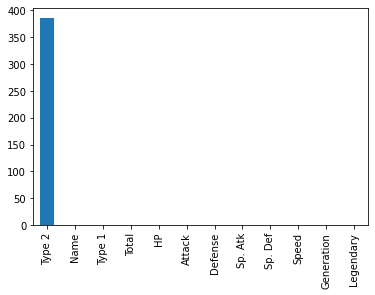

In [14]:
## Visualización de datos faltantes
pokemon.isnull().sum().sort_values(ascending=False).plot(kind='bar')

In [19]:
print('='*64)
print('Para ver la cantidad de datos faltantes a nivel %')
print('='*64)
print((pokemon.isnull().mean()*100).sort_values(ascending=False))
print('='*64)

Para ver la cantidad de datos faltantes a nivel %
Type 2        48.25
Name           0.00
Type 1         0.00
Total          0.00
HP             0.00
Attack         0.00
Defense        0.00
Sp. Atk        0.00
Sp. Def        0.00
Speed          0.00
Generation     0.00
Legendary      0.00
dtype: float64


## Concatenando variables

In [43]:
type_of_combined = pokemon['Type 1'].str.cat(pokemon['Type 2'],sep='-',na_rep='nan')
type_of_combined

0       Grass-Poison
1       Grass-Poison
2       Grass-Poison
3       Grass-Poison
4           Fire-nan
           ...      
795       Rock-Fairy
796       Rock-Fairy
797    Psychic-Ghost
798     Psychic-Dark
799       Fire-Water
Name: Type 1, Length: 800, dtype: object

## Creando una nueva variable 

In [44]:
pokemon['Type_of_conc'] = type_of_combined
pokemon.head()

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Type_of_conc
0,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False,Grass-Poison
1,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False,Grass-Poison
2,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False,Grass-Poison
3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False,Grass-Poison
4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False,Fire-nan


## ¿Cuál es la diferencia en el Attack dado el Type 1 del pokemon?

In [46]:
pokemon['Type 1'].value_counts(ascending=False)

Water       112
Normal       98
Grass        70
Bug          69
Psychic      57
Fire         52
Electric     44
Rock         44
Ground       32
Dragon       32
Ghost        32
Dark         31
Poison       28
Steel        27
Fighting     27
Ice          24
Fairy        17
Flying        4
Name: Type 1, dtype: int64

<AxesSubplot:>

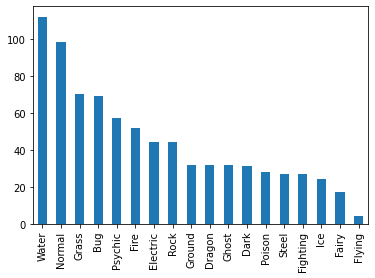

In [48]:
pokemon['Type 1'].value_counts(ascending=False).plot(kind='bar')

In [50]:
pokemon['Type 1'].value_counts(ascending=False, normalize=True)

Water       0.14000
Normal      0.12250
Grass       0.08750
Bug         0.08625
Psychic     0.07125
Fire        0.06500
Electric    0.05500
Rock        0.05500
Ground      0.04000
Dragon      0.04000
Ghost       0.04000
Dark        0.03875
Poison      0.03500
Steel       0.03375
Fighting    0.03375
Ice         0.03000
Fairy       0.02125
Flying      0.00500
Name: Type 1, dtype: float64

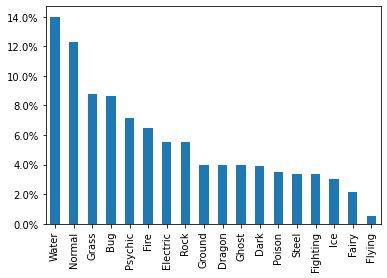

In [59]:
(pokemon['Type 1'].value_counts(ascending=False, normalize=True)*100).plot(kind='bar').yaxis.set_major_formatter(mtick.PercentFormatter())


<AxesSubplot:xlabel='Type 1', ylabel='Attack'>

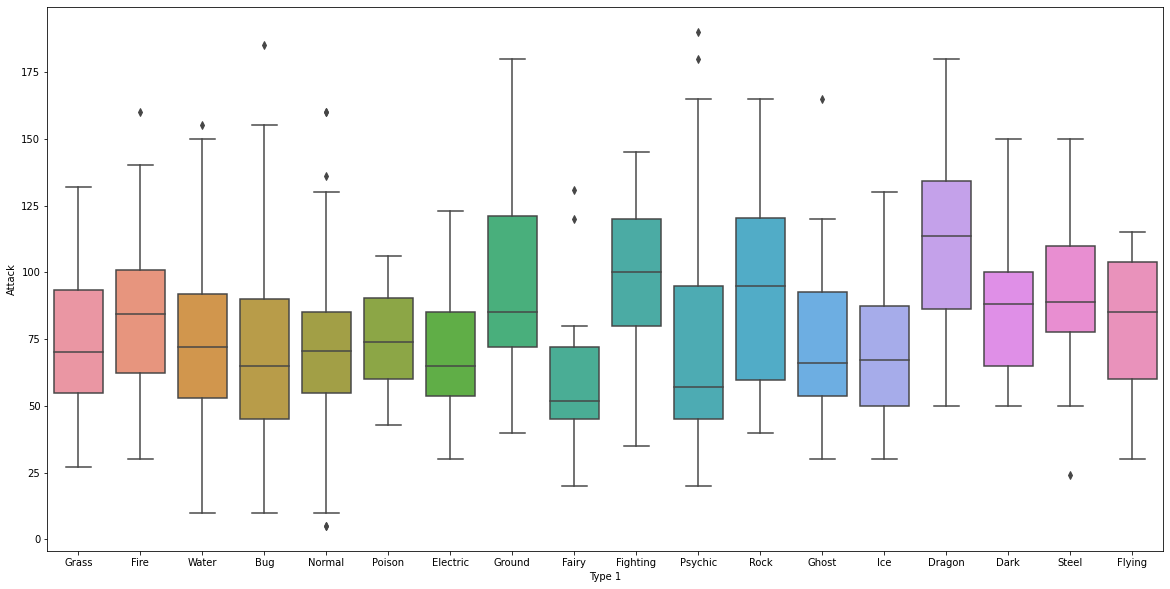

In [69]:
## Entendiendo las diferencias puntuales por grupos
import seaborn as sns
plt.figure(figsize=(20,10))
sns.boxplot(x = "Type 1", y = "Attack",
            data = pokemon) 

Text(0.5, 0, 'Type of Pokemon')

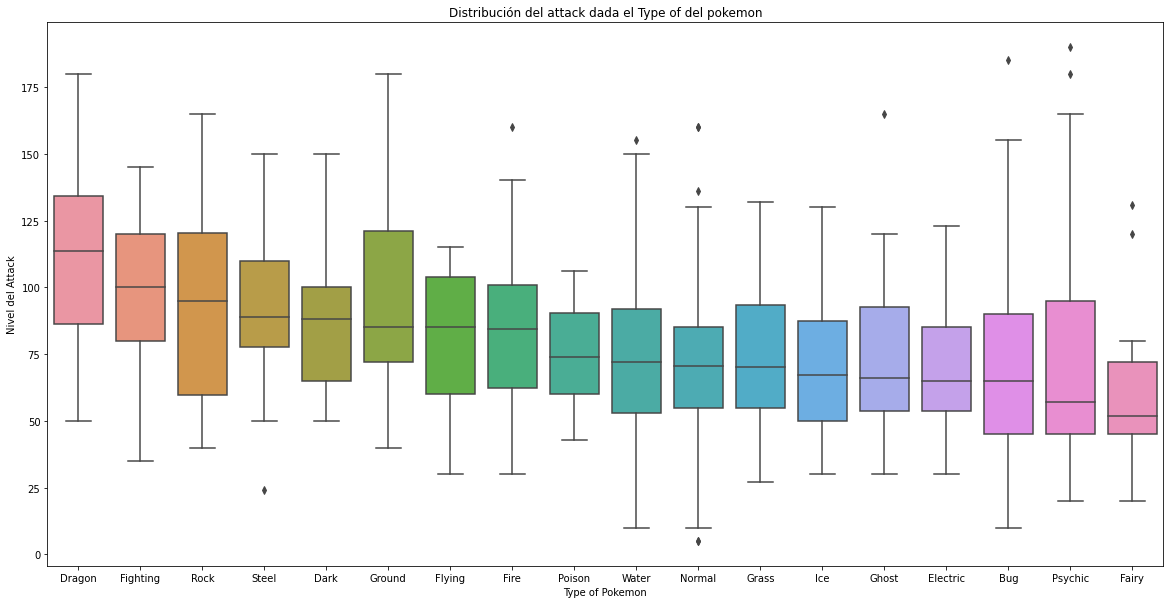

In [82]:
## Ordenando la distribución 
import seaborn as sns
plt.figure(figsize=(20,10))
my_order = pokemon.groupby(['Type 1'])['Attack'].median().iloc[::-1].sort_values(ascending=False).index
sns.boxplot(x = "Type 1", 
            y = "Attack",
            data = pokemon, order=my_order) 
plt.title('Distribución del attack dada el Type of del pokemon')
plt.ylabel('Nivel del Attack')
plt.xlabel('Type of Pokemon')

Text(0.5, 0, 'Type of Pokemon')

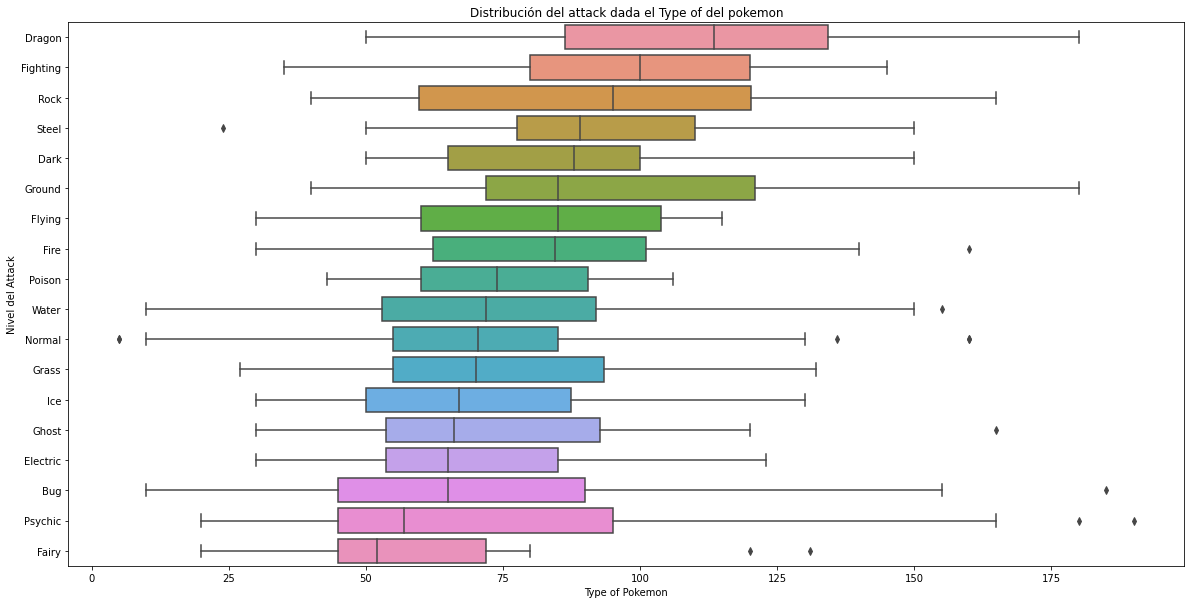

In [83]:
## Una forma más elegante de ver esto sería 

plt.figure(figsize=(20,10))
my_order = pokemon.groupby(['Type 1'])['Attack'].median().iloc[::-1].sort_values(ascending=False).index
sns.boxplot(y = "Type 1", 
            x = "Attack",
            data = pokemon, order=my_order) 
plt.title('Distribución del attack dada el Type of del pokemon')
plt.xlabel('Nivel del Attack')
plt.ylabel('Type of Pokemon')

<AxesSubplot:xlabel='Attack', ylabel='Count'>

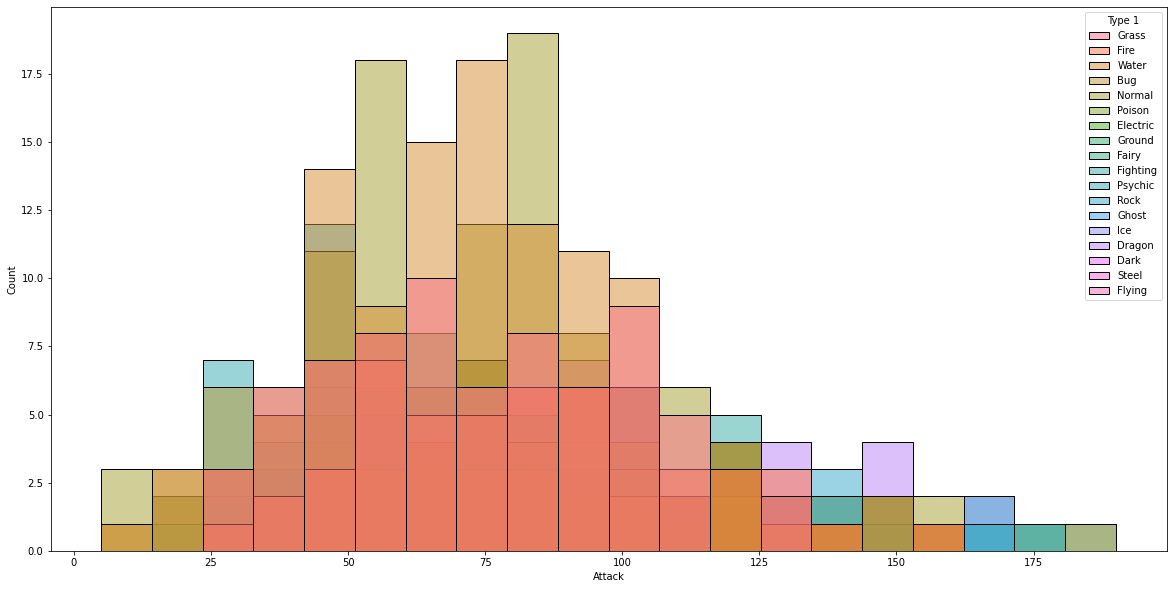

In [86]:
#sns.histplot(data=penguins, x="flipper_length_mm", hue="species")
plt.figure(figsize=(20,10))
sns.histplot(data=pokemon,x='Attack', hue='Type 1')


/Users/danjimenez/miniconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:2073: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


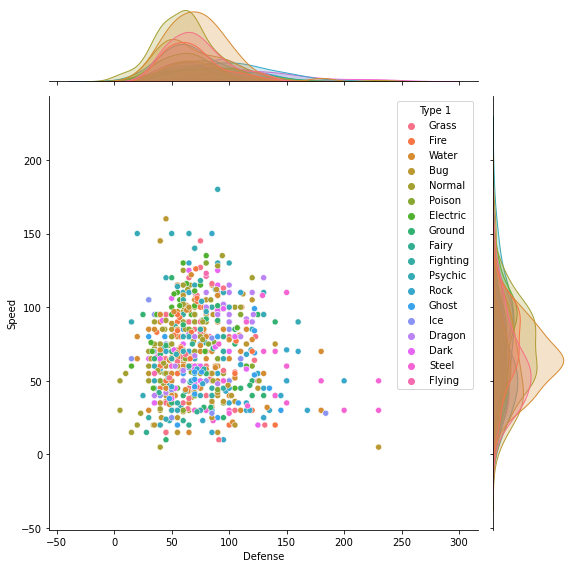

In [90]:
sns.jointplot(x='Defense', 
              y='Speed', 
              data=pokemon, 
              color ='green', 
              kind ='scatter', 
              hue='Type 1',
              size = 8.0)

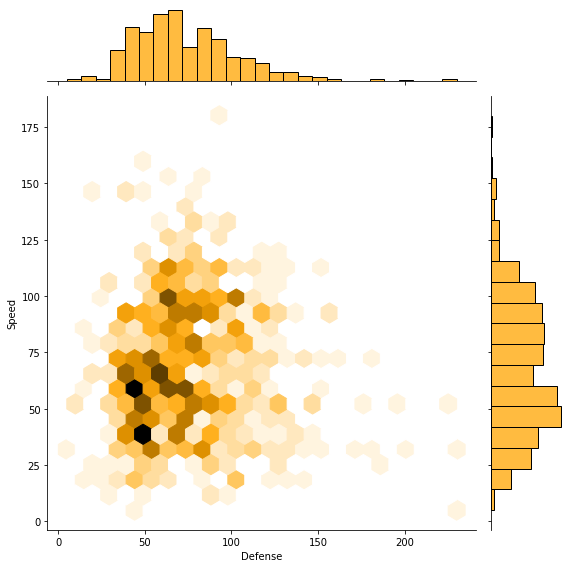

In [95]:
sns.jointplot(x='Defense', 
              y='Speed', 
              data=pokemon, 
              color ='orange', 
              kind ='hex', 
              size = 8.0)

<Figure size 1440x720 with 0 Axes>

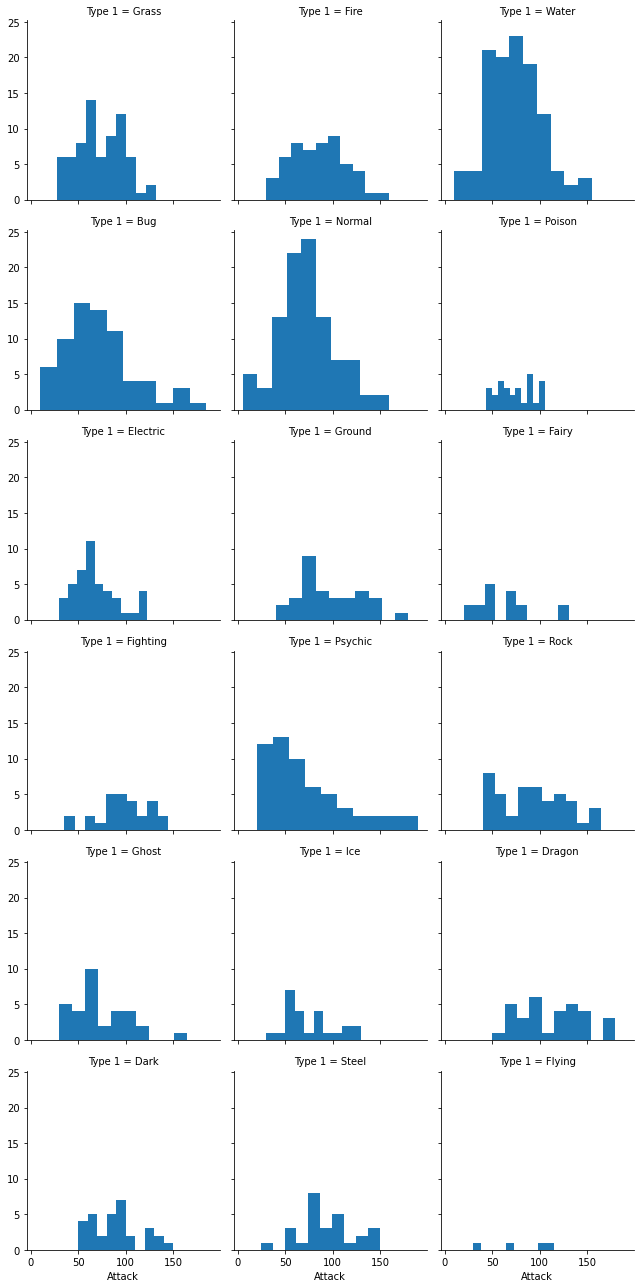

In [111]:
plt.figure(figsize=(20,10))
g = sns.FacetGrid(pokemon, col='Type 1', col_wrap=3,sharex=True,sharey=True)
g.map(plt.hist,'Attack')

In [119]:
pokemon.groupby(['Type 1'])['Type 2'].value_counts()

Type 1  Type 2  
Bug     Flying      14
        Poison      12
        Steel        7
        Grass        6
        Rock         3
                    ..
Water   Dragon       2
        Electric     2
        Fairy        2
        Ghost        2
        Steel        1
Name: Type 2, Length: 136, dtype: int64

In [127]:
## Tablas cruzadas
pd.crosstab(pokemon['Type 1'],pokemon['Generation'])

Generation,1,2,3,4,5,6
Type 1,,,,,,
Bug,14,12,12,10,18,3
Dark,0,6,6,3,13,3
Dragon,3,0,12,4,9,4
Electric,9,7,5,12,8,3
Fairy,2,5,0,1,0,9
Fighting,7,2,5,3,7,3
Fire,14,8,8,5,9,8
Flying,0,0,0,0,2,2
Ghost,4,1,5,7,5,10


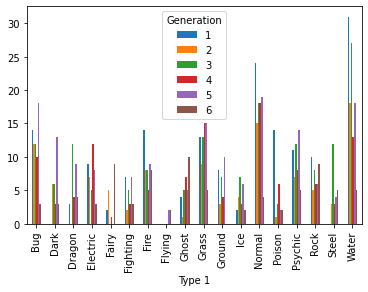

In [138]:
table = pd.crosstab(pokemon['Type 1'],pokemon['Generation'])
table.plot(kind='bar')
plt.show()

<AxesSubplot:xlabel='Type 1'>

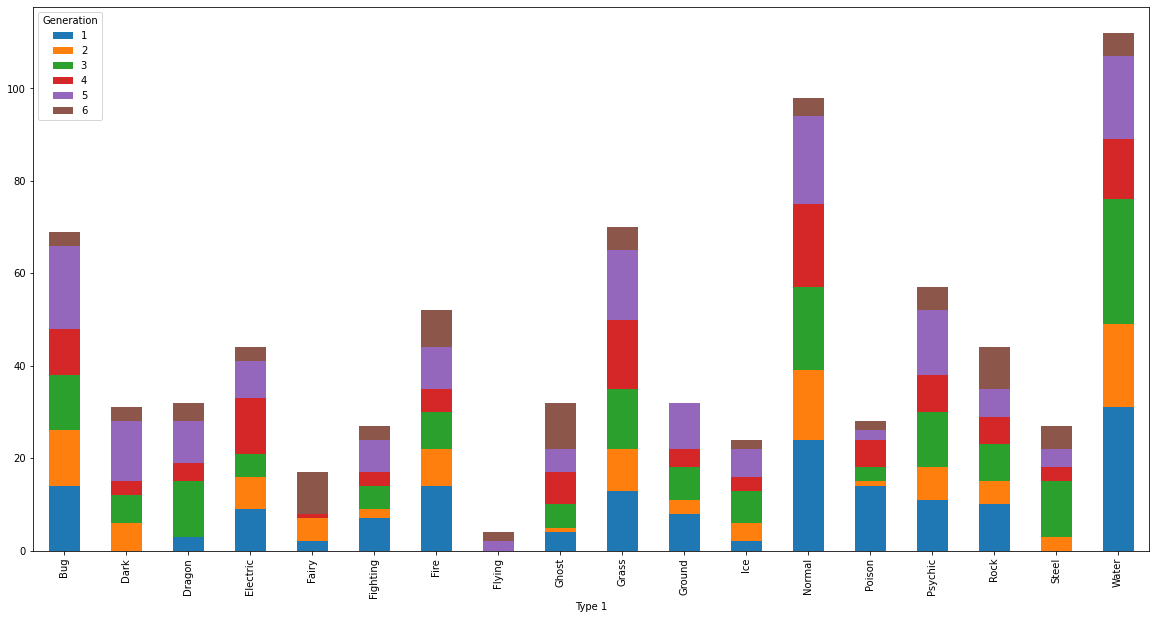

In [147]:
from matplotlib.pyplot import figure
plt.rcParams["figure.figsize"] = (20,10)
table.plot(kind='bar',stacked = True)

## Busqueda de valores anómalos

In [148]:
import numpy as np
def outlier_check(data):

   
    M = max(data)
    m, s = np.mean(data), np.std(data)
    
   
    L, H = m-2*s, m+2*s
    
    
    f, ax = plt.subplots()
    f.set_figheight(5)
    f.set_figwidth(5)
    ax.set_ylim([0,0.025])
    ax.set_xlim([0,M])
    ax.set_title('"{}" outlier detection'.format(data.name))
    
    
    ax.vlines(H, 0, 0.025, color='red', linestyle='dashed')
    ax.fill_between(x=[H,M], y1=0.025, color='red', alpha=.05)
    
    
    ax.vlines(L, 0, 0.025, color='red', linestyle='dashed')
    ax.fill_between(x=[0,L], y1=0.025, color='red', alpha=.05)
    
    
    sns.distplot(data, ax=ax)
    
    
    return data[(data<L) | (data>H)].index

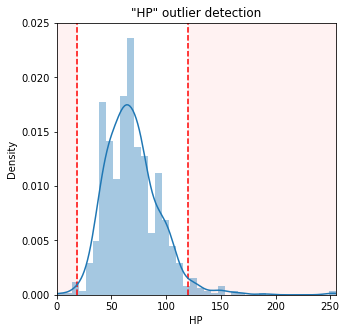

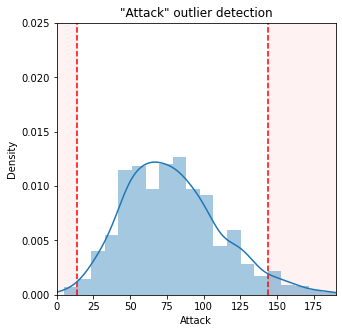

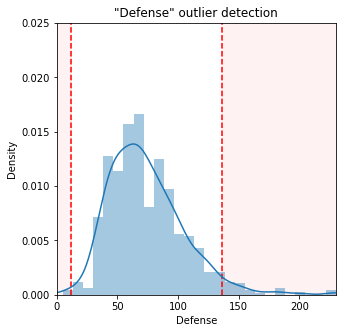

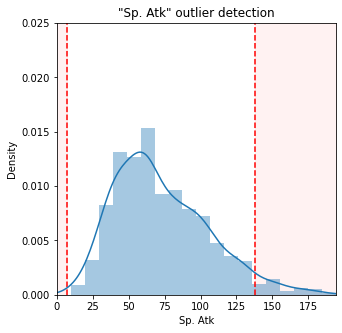

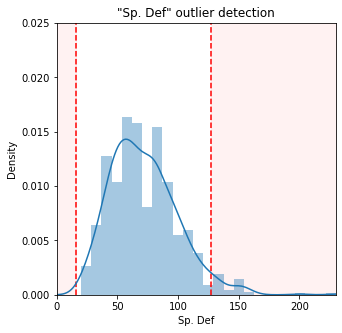

In [153]:
stats = pokemon.columns[4:-3]
pokemon['Outlier'] = np.zeros((len(pokemon),1))
for var in stats:
    pokemon.loc[outlier_check(pokemon[var]),'Outlier'] = 1